# Predicting Boston Housing Prices

### Load the Boston housing dataset

In [10]:
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


### Descriptive statistics

In [11]:
minimum_price = np.amin(prices)

maximum_price = np.amax(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation
RM: When the average number of rooms increases, the value of MDEV increases because the house is bigger.

LSTAT: When the value of LSTAT decreases, which means more rich people live in the aera, the value of MDEV increases because the seller knows rich people would like to live in this area and the seller can easily increase the selling price of the house.

PTRATIO: When the value of PTRATIO increases, the value of MDEV increases because the sellers know most of parents, especially the rich people, want their children having a good education and would like to live near good schools even though they have to pay high price for the house.

----

## Model Evaluation & Validation
### Performance metric

In [12]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    score = r2_score(y_true, y_predict) 
    
    return score

### Shuffle and Split Data
- Split the data into 80% training and 20% testing.
- Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [13]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn import cross_validation

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, prices, test_size=0.2, random_state=0)

print "Training and testing split was successful."

Training and testing split was successful.


### Analyzing Model Performance

### Learning Curves

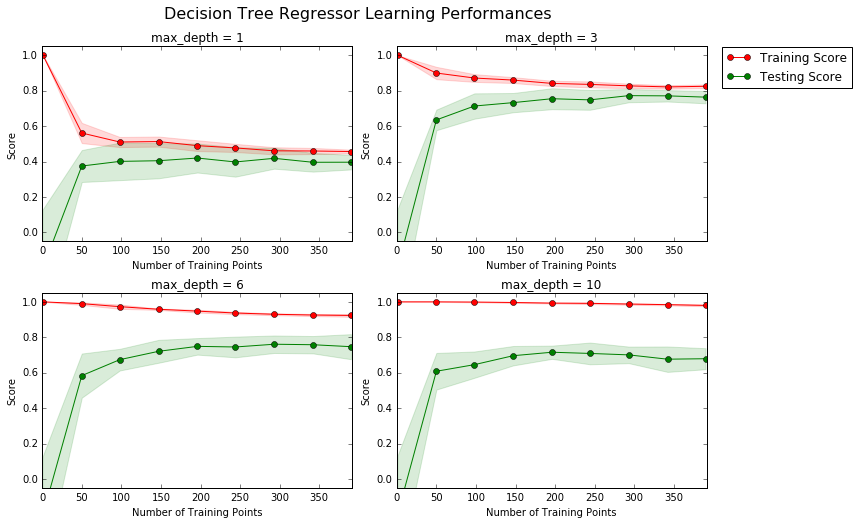

In [14]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

I choose the model with a max depth of 3. As more training points are added, the training score decreases and the testing score increses. The model generalizes well since both the training and testing curves converage at similar value. Having more training points can reduce the variance of the model. Since the variance of the model is small when the training points reached 300 and it kept steady. Haveing more than 400 training points would not benefit the model. 

### Complexity Curves

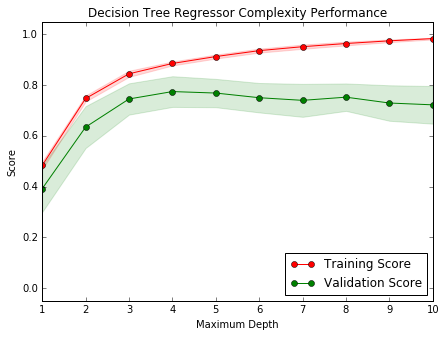

In [15]:
vs.ModelComplexity(X_train, y_train)

The model trained with a maximum depth of 1 suffers from high bias because the training score and the validation score converges but are both low. The model trained with a maximum depth of 10 suffers from high variance because there is a big gap between the training score and the validation score.
The model with a max depth of 3 best generalizes to unseen data because the variance of the model is small and the training score is the highest when the number of training points reached 400.

### Evaluating Model Performance

### Fitting a Model

In [16]:
import numpy as np
from sklearn.metrics import r2_score, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # A decision tree regressor object
    regressor = DecisionTreeRegressor()

    # A dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # The grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

----
## Making Predictions

### Optimal Model

In [17]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Case for selling price prediction
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? 

In [18]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $324,240.00
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


Client 1: I would recommend the client 1 sell the house around the median price, which is higher than the predicted price. The predicted price seems unreasonable given the values of the features because the number of rooms is mediocre and the features, 'LSTAT' and 'PTRATIO', are good enough.

Client 2: I think the model has a fair prediction because the three fearues of the house are not good. Thus, I would recommand the client 2 sell the home at 189,123.53. The predicted value, which is below the median price, is reasonable given the values for the respective features.

Client 3: I would recommend the client 3 sell the house at $942,666.67 because three fearues are good enough. The predicted price which is much higher than the median price seems resonable given the values for the respective features. 

### Run the `fit_model` function ten times with different training and testing sets 

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $103,732.22


## Applicability
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

1. Basically, the features of data, RM, LSTAT and PTRATIO, still have impact on MDEV today, but MEDV must be higher due to inflation and the development of the area.

2. The features, RM, LSTAT and PTRATIO are considered essential to MDEV, and the otehrs are not relevent. According to the experiment, the model given the values of three features can have a good prediction on MDEV. Thus, the features present in the data are sufficient to describe a home.

3. No, the predictions made by the optimal model cannot be perfect due to the model is too simple or complex to sufficiently generalize to new data. Data itself could also be too noisy or contain few samples to allow a model to capture the target variable.

4. No, the data collected in an urban city cannot be applied to the rural city. Even though three features, RM, LSTAT and PTRATIO might be good to predict MDEV in a rural city, but these features in two different areas can have the different level of impact on MDEV. Thus, the model trained by the data collected in an urban city is not good enough for the prediction in an rural city. 